In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [2]:
# import dataset

df = pd.read_csv('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/Employee_Attrition_Data_Set(1).csv')

In [3]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [4]:
clean_data = df

In [5]:
clean_data.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [7]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

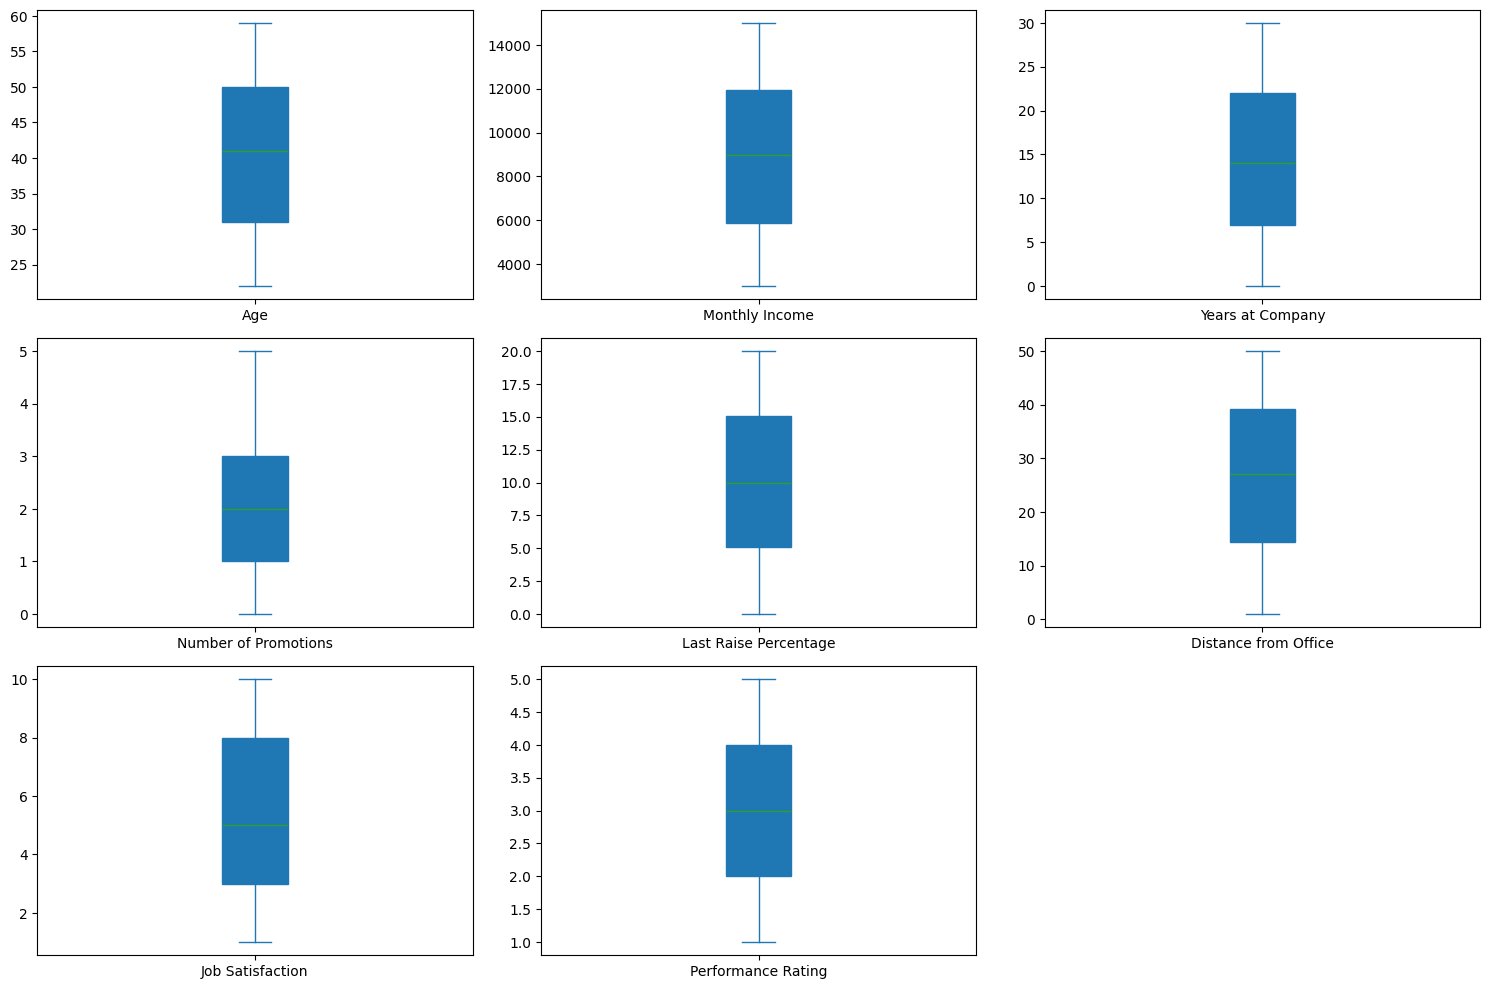

In [10]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating']

# Create boxplots for each specified variable
clean_data[variables_of_interest].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [11]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

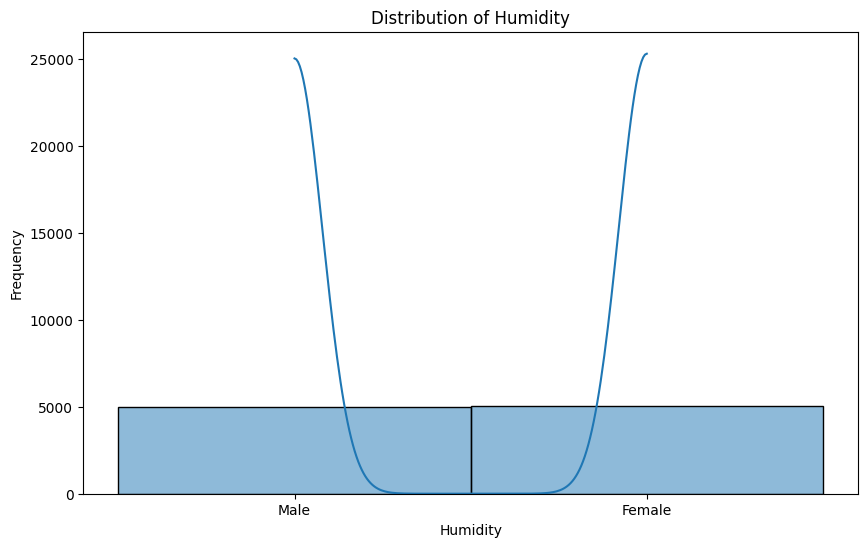

In [13]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['Gender'], bins=30, kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Set the variables that we want to check the correlations
var = ['Age', 'Monthly Income', 'Seat comfort', 'Baggage handling', 'Flight Distance']

# Assuming 'df' is your DataFrame containing these variables
# Select only the columns of interest
df_selected = clean_data[var]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Set the figure size for the heatmap (correlation matrix)
plt.figure(figsize=(18, 10))

# Create the heatmap (only for numerical numbers)
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()